#Data 05: Personal Loan data
* Data from: [Personal Loan](https://www.kaggle.com/itsmesunil/bank-loan-modelling)  
Personal Loan 데이터는 고객을 더 늘리고자 하는 가상의 은행 데이터이다.  
이 회사의 경영진은 부채를 가진 고객을 개인 대출 고객으로 전환하는 방법을 모색하려고 한다.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##1.데이터 둘러보기

In [2]:
#한글 폰트 설정하기
!sudo apt-get install -y fonts-nanum # 글꼴 설치하기.
!sudo fc-cache -fv # 글꼴 캐시를 스캔한다.
!rm ~/.cache/matplotlib -rf # font 정보를 fontlist.json 에서 관리한다.
#런타임 다시 시작

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (9,858 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [1]:
import matplotlib.font_manager as fm # 폰트를 다루기 위한 모듈이다.
font_list=fm.findSystemFonts(fontpaths=None, fontext="ttf") # 지정된 경로에서 글꼴을 검색한다.
print(len(font_list))

27


In [2]:
font_list

['/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRo

In [3]:
path=[path for path in font_list if "NanumGothic" in path]
path=path[-1]

In [4]:
font_name=fm.FontProperties(fname=path).get_name()
font_name

'NanumGothic'

In [5]:
#기본 패키지 불러오기
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn')
sns.set(font_scale=1)
plt.rc('font', family=font_name) # 나눔 고딕 폰트 지정하기.
plt.rcParams['font.family'] = font_name 

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [6]:
#구글 드라이브 마운트하기(이미 되어있다면 건너뛴다)
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
#데이터 불러오기
#데이터 파일 열어보면 sheet 1은 데이터 설명, sheet 2가 실제 데이터이므로 sheet 2만 가져온다!
bk = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Bank_Personal_Loan_Modelling.xlsx', sheet_name=1) # sheet_name=1

In [8]:
#불러온 데이터 일단 보기
bk.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


<컬럼 설명>

* ID: 고객 번호
* Age: 나이
* Experience: 사회 생활
* Income: 연간 수입 (달러 000)  
* Zipcode: 우편번호  
* Family: 가족 구성원 수
* CCAvg: 신용카드 월평균 이용 금액 (달러 000)  
* Education: 학력(1: Undergrad, 2: Graduate, 3: Advanced/Professional)
* Mortgage: 주택 담보 대출 금액(달러 000)
* Personal Loan: 지난번 영업에서 고객이 개인대출을 받았는가?(0: N, 1: Y)  
* Securities Account: 보험 유무(0: N, 1: Y)  
* CD Account: 양도성 예금증서 보유 유무(0: N, 1: Y)  
* Online: 온라인 뱅킹 유무(0: N, 1: Y)
* Credit Card: 신용카드 보유 유무(0: N, 1: Y)


* 범주형 변수: *빈도frequency 계산 가능*
               ID, zipcode, educaiont, personal loan, securities account, cd account, online, credit card
* 연속형 변수: *평균, 표준편차, min/max 등 수치 계산 가능*
               age, experience, income, family, ccavg, mortgage

In [9]:
bk["ID"].unique()

array([   1,    2,    3, ..., 4998, 4999, 5000])

In [10]:
#데이터 기본 정보 확인하기
bk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [11]:
#변수형 컬럼 안에는 어떤 내용이 들어있을까?
print('Education: ', bk['Education'].unique())
print('Personal Loan: ', bk['Personal Loan'].unique())
print('Securities Account: ', bk['Securities Account'].unique())
print('CD Account: ', bk['CD Account'].unique())
print('Online: ', bk['Online'].unique())
print('CreditCard: ', bk['CreditCard'].unique())

Education:  [1 2 3]
Personal Loan:  [0 1]
Securities Account:  [1 0]
CD Account:  [0 1]
Online:  [0 1]
CreditCard:  [0 1]


In [12]:
#연속형(수치) 데이터의 통계치 확인하기
bk.describe().transpose() # 보기가 더 편리하다.

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [13]:
#데이터 내용 정리해서 출력하기
print("총 데이터 수: ", bk.shape[0]*bk.shape[1])
print("총 결측치 수: {} = 전체 데이터의 {:.2f}% ".format(bk.isnull().sum().sum(), (bk.isnull().sum().sum()*100)/(bk.shape[0]*bk.shape[1])))
print("Thera bank 고객의 나이는 {}세부터 {}세까지 있으며 평균 나이는 {:.1f}세이다.".format((bk['Age'].min()),(bk['Age'].max()), (bk['Age'].mean())))
print("Thera bank 고객의 평균 수입은 {:.1f} $이며, 최고수입은 {} $로 평균의 {:.1f}배이다.".format((bk['Income'].mean()*1000), (bk['Income'].max()*1000), (bk['Income'].max()/(bk['Income'].mean()))))

총 데이터 수:  70000
총 결측치 수: 0 = 전체 데이터의 0.00% 
Thera bank 고객의 나이는 23세부터 67세까지 있으며 평균 나이는 45.3세이다.
Thera bank 고객의 평균 수입은 73774.2 $이며, 최고수입은 224000 $로 평균의 3.0배이다.


##2.질문하기

* 수입/월평균신용카드사용량/가족인원수와 대출 사이의 관계는?
* 월 평균 사용 금액을 구간화 해서 특징을 볼 수 있을까?
* 로지스틱 회귀 분석을 사용해서 신규 고객의 대출여부를 예측하는 모델 만들기 (목적)


##3.데이터 정비하기

###3-1. 컬럼명 바꾸기

In [14]:
#중복 데이터 확인
bk.duplicated().sum()

0

In [15]:
#컬럼명 확인하기
bk.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [16]:
#컬럼명 변경하기
# 강의에서는 직접 소문자를 입력하였지만, 소문자로 변경하는 함수(lower)와 덧붙여주는 함수(append)를 이용하여 만들어주었다.
new_colList=[]
for col in bk.columns:
    new_col=col.lower()
    new_colList.append(new_col)

bk.columns=new_colList
bk.head()

,id,age,experience,income,zip code,family,ccavg,education,mortgage,personal loan,securities account,cd account,online,creditcard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


###3-2. 필요없는 컬럼 제거

In [17]:
#id, zip code는 분석과 큰 연관관계가 없으므로 제거
bk1 = bk.drop(['id','zip code'], axis=1, inplace=False)

In [18]:
bk1.head() # 분석에 필요한 칼럼만 들은 데이터이다.

,age,experience,income,family,ccavg,education,mortgage,personal loan,securities account,cd account,online,creditcard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


##4.EDA & Visualization

###4-1. 간단한 분석

In [19]:
#수입과 대출 사이의 관계 집계하기
df1 = bk1.groupby('personal loan')['income'].agg([np.mean, "count"])
df1.rename(columns={'mean': 'Income Mean','count':'Number of People'})

,Income Mean,Number of People
personal loan,,
0,66.237389,4520
1,144.745833,480


대출을 한 사람은 대출을 하지 않은 사람보다 평균 수입이 2배 이상 높다.

In [20]:
#수입과 대출 사이의 관계 집계하기
df1 = bk1.groupby('personal loan')['income'].agg([np.mean, len]) # numpy에서 count대신 len을 이용하기 때문에, len을 사용해도 된다.
df1.rename(columns={'mean': 'Income Mean',"len" :'Number of People'})

,Income Mean,Number of People
personal loan,,
0,66.237389,4520
1,144.745833,480


In [21]:
#월평균 신용카드 사용액과 대출 사이의 관계 집계하기
df2 = bk1.groupby('personal loan')['ccavg'].agg([np.mean,'count'])
df2.rename(columns={'mean': 'CCAvg Mean','count':'Number of People'})

,CCAvg Mean,Number of People
personal loan,,
0,1.728982,4520
1,3.905347,480


대출을 하지 않은 사람보다 대출을 한 사람의 신용카드 평균 금액의 평균이 훨씬 크다.

In [22]:
#가족 인원수와 대출 사이의 관계 집계하기
df3 = bk1.groupby('family')['personal loan'].agg([np.mean, "count"])
df3.rename(columns={'mean': 'Personal Loan Mean','count':'Number of People'})

,Personal Loan Mean,Number of People
family,,
1,0.072690,1472
2,0.081790,1296
3,0.131683,1010
4,0.109656,1222


가족의 수가 많을수록 평균 대출 금액이 크다.

###4-2. 변수의 분포 확인하기

In [23]:
bk1.head()

,age,experience,income,family,ccavg,education,mortgage,personal loan,securities account,cd account,online,creditcard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [24]:
bk1[bk1["mortgage"]!=0]["mortgage"]

5       155
8       104
16      134
20      111
22      260
       ... 
4987    159
4988    136
4990    219
4991    100
4996     85
Name: mortgage, Length: 1538, dtype: int64

In [25]:
bk1["mortgage"][bk1["mortgage"]!=0]

5       155
8       104
16      134
20      111
22      260
       ... 
4987    159
4988    136
4990    219
4991    100
4996     85
Name: mortgage, Length: 1538, dtype: int64

In [26]:
bk1.loc[bk1["mortgage"]!=0, "mortgage"]

5       155
8       104
16      134
20      111
22      260
       ... 
4987    159
4988    136
4990    219
4991    100
4996     85
Name: mortgage, Length: 1538, dtype: int64

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


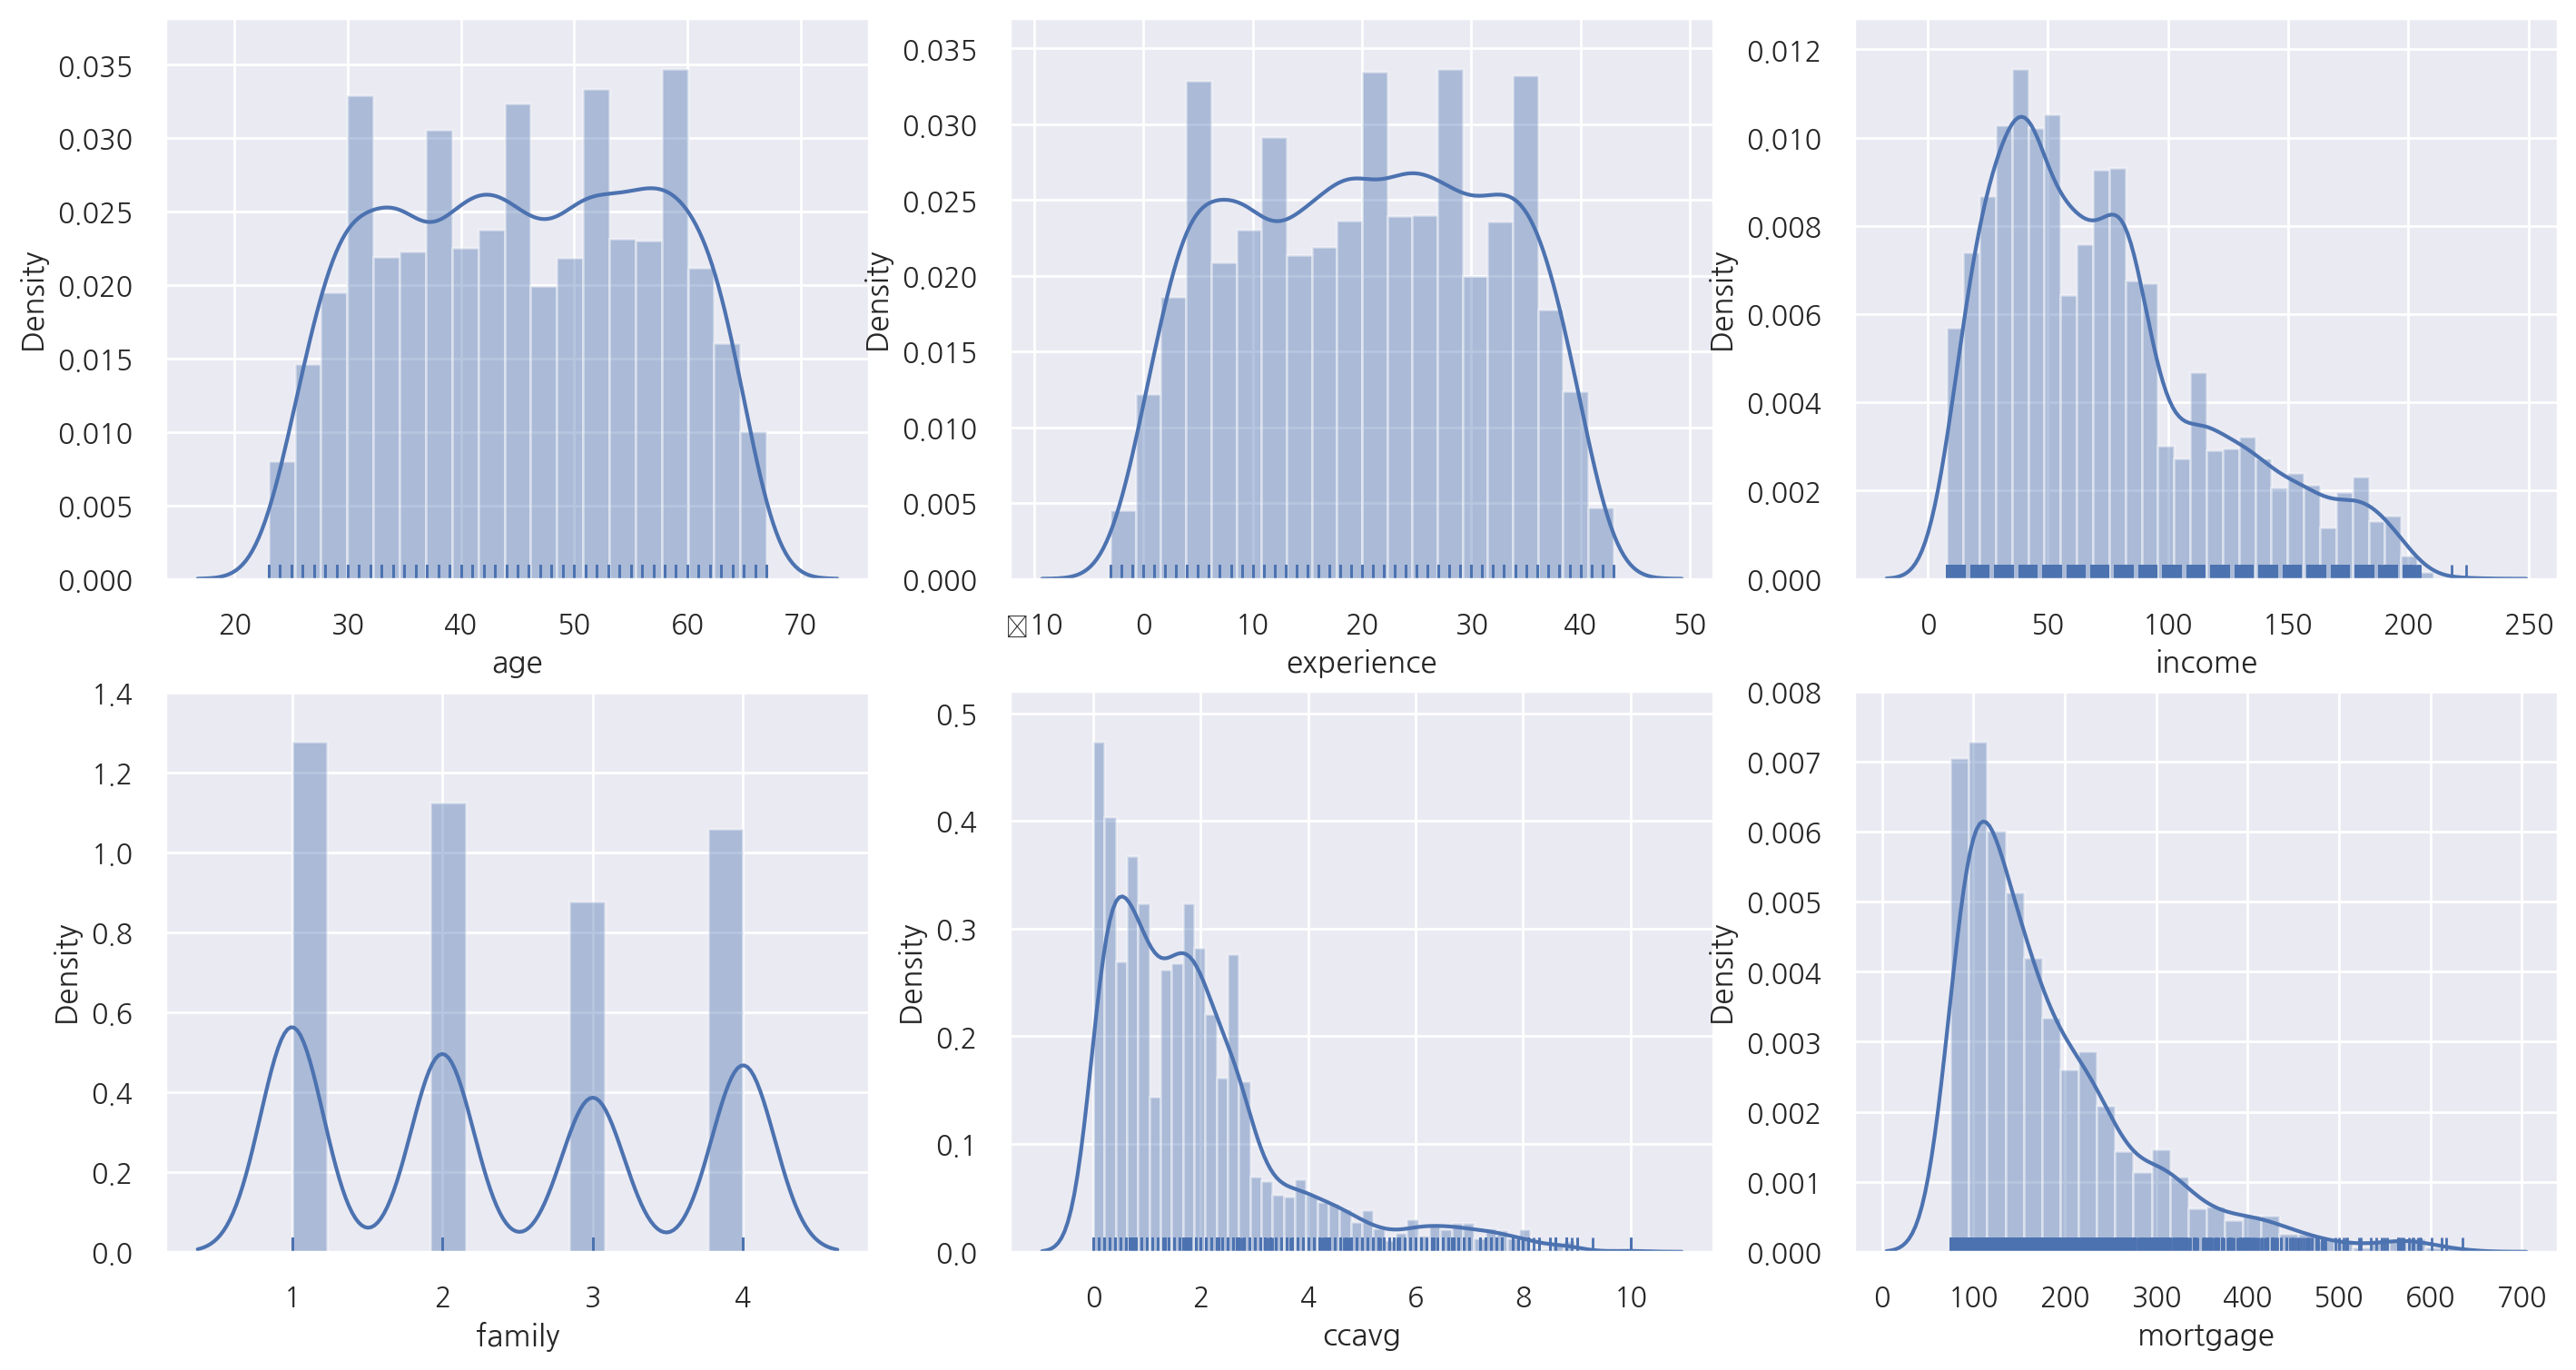

In [65]:
#연속형 변수의 분포 확인하기
f, ax = plt.subplots(2, 3, figsize=(17, 9), dpi=200)

sns.distplot(bk1['age'], ax=ax[0,0], rug=True)
sns.distplot(bk1['experience'], ax=ax[0,1], rug=True)
sns.distplot(bk1['income'], ax=ax[0,2], rug=True)
sns.distplot(bk1['family'], ax=ax[1,0], rug=True)
sns.distplot(bk1['ccavg'], ax=ax[1,1], rug=True)
# sns.distplot(bk['mortgage'], ax=ax[1,2], rug=True) # 0의 분포가 너무 많아서 0을 뺀 나머지 분포을 알아보기 위하여 밑의 코드를 이용한다.
sns.distplot(bk1.loc[bk1["mortgage"]!=0, "mortgage"], ax=ax[1,2], rug=True) #0인 것은 빼고 그리자!

plt.show()

* age와 experience는 관련성이 높기 때문에 비슷한 경향성을 보인다. 
* income은 고소득으로 넘어갈 수록, 밀도가 적음을 알 수 있다.
* 가족 구성원은 1인 가구가 가장 많고, 3인 가구가 가장 적다.
* 신용카드 평균 사용 금액이 많을수록, 밀도가 적음을 알 수 있다.
* 주택 담보대출을 확인하려고 보니, 없는 경우가 훨씬 많아서 없는 경우를 제외하고 경향성을 확인하였다. 담보대출이 많을수록 밀도가 적어짐을 알 수 있다.

In [28]:
bk1.describe()

,age,experience,income,family,ccavg,education,mortgage,personal loan,securities account,cd account,online,creditcard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


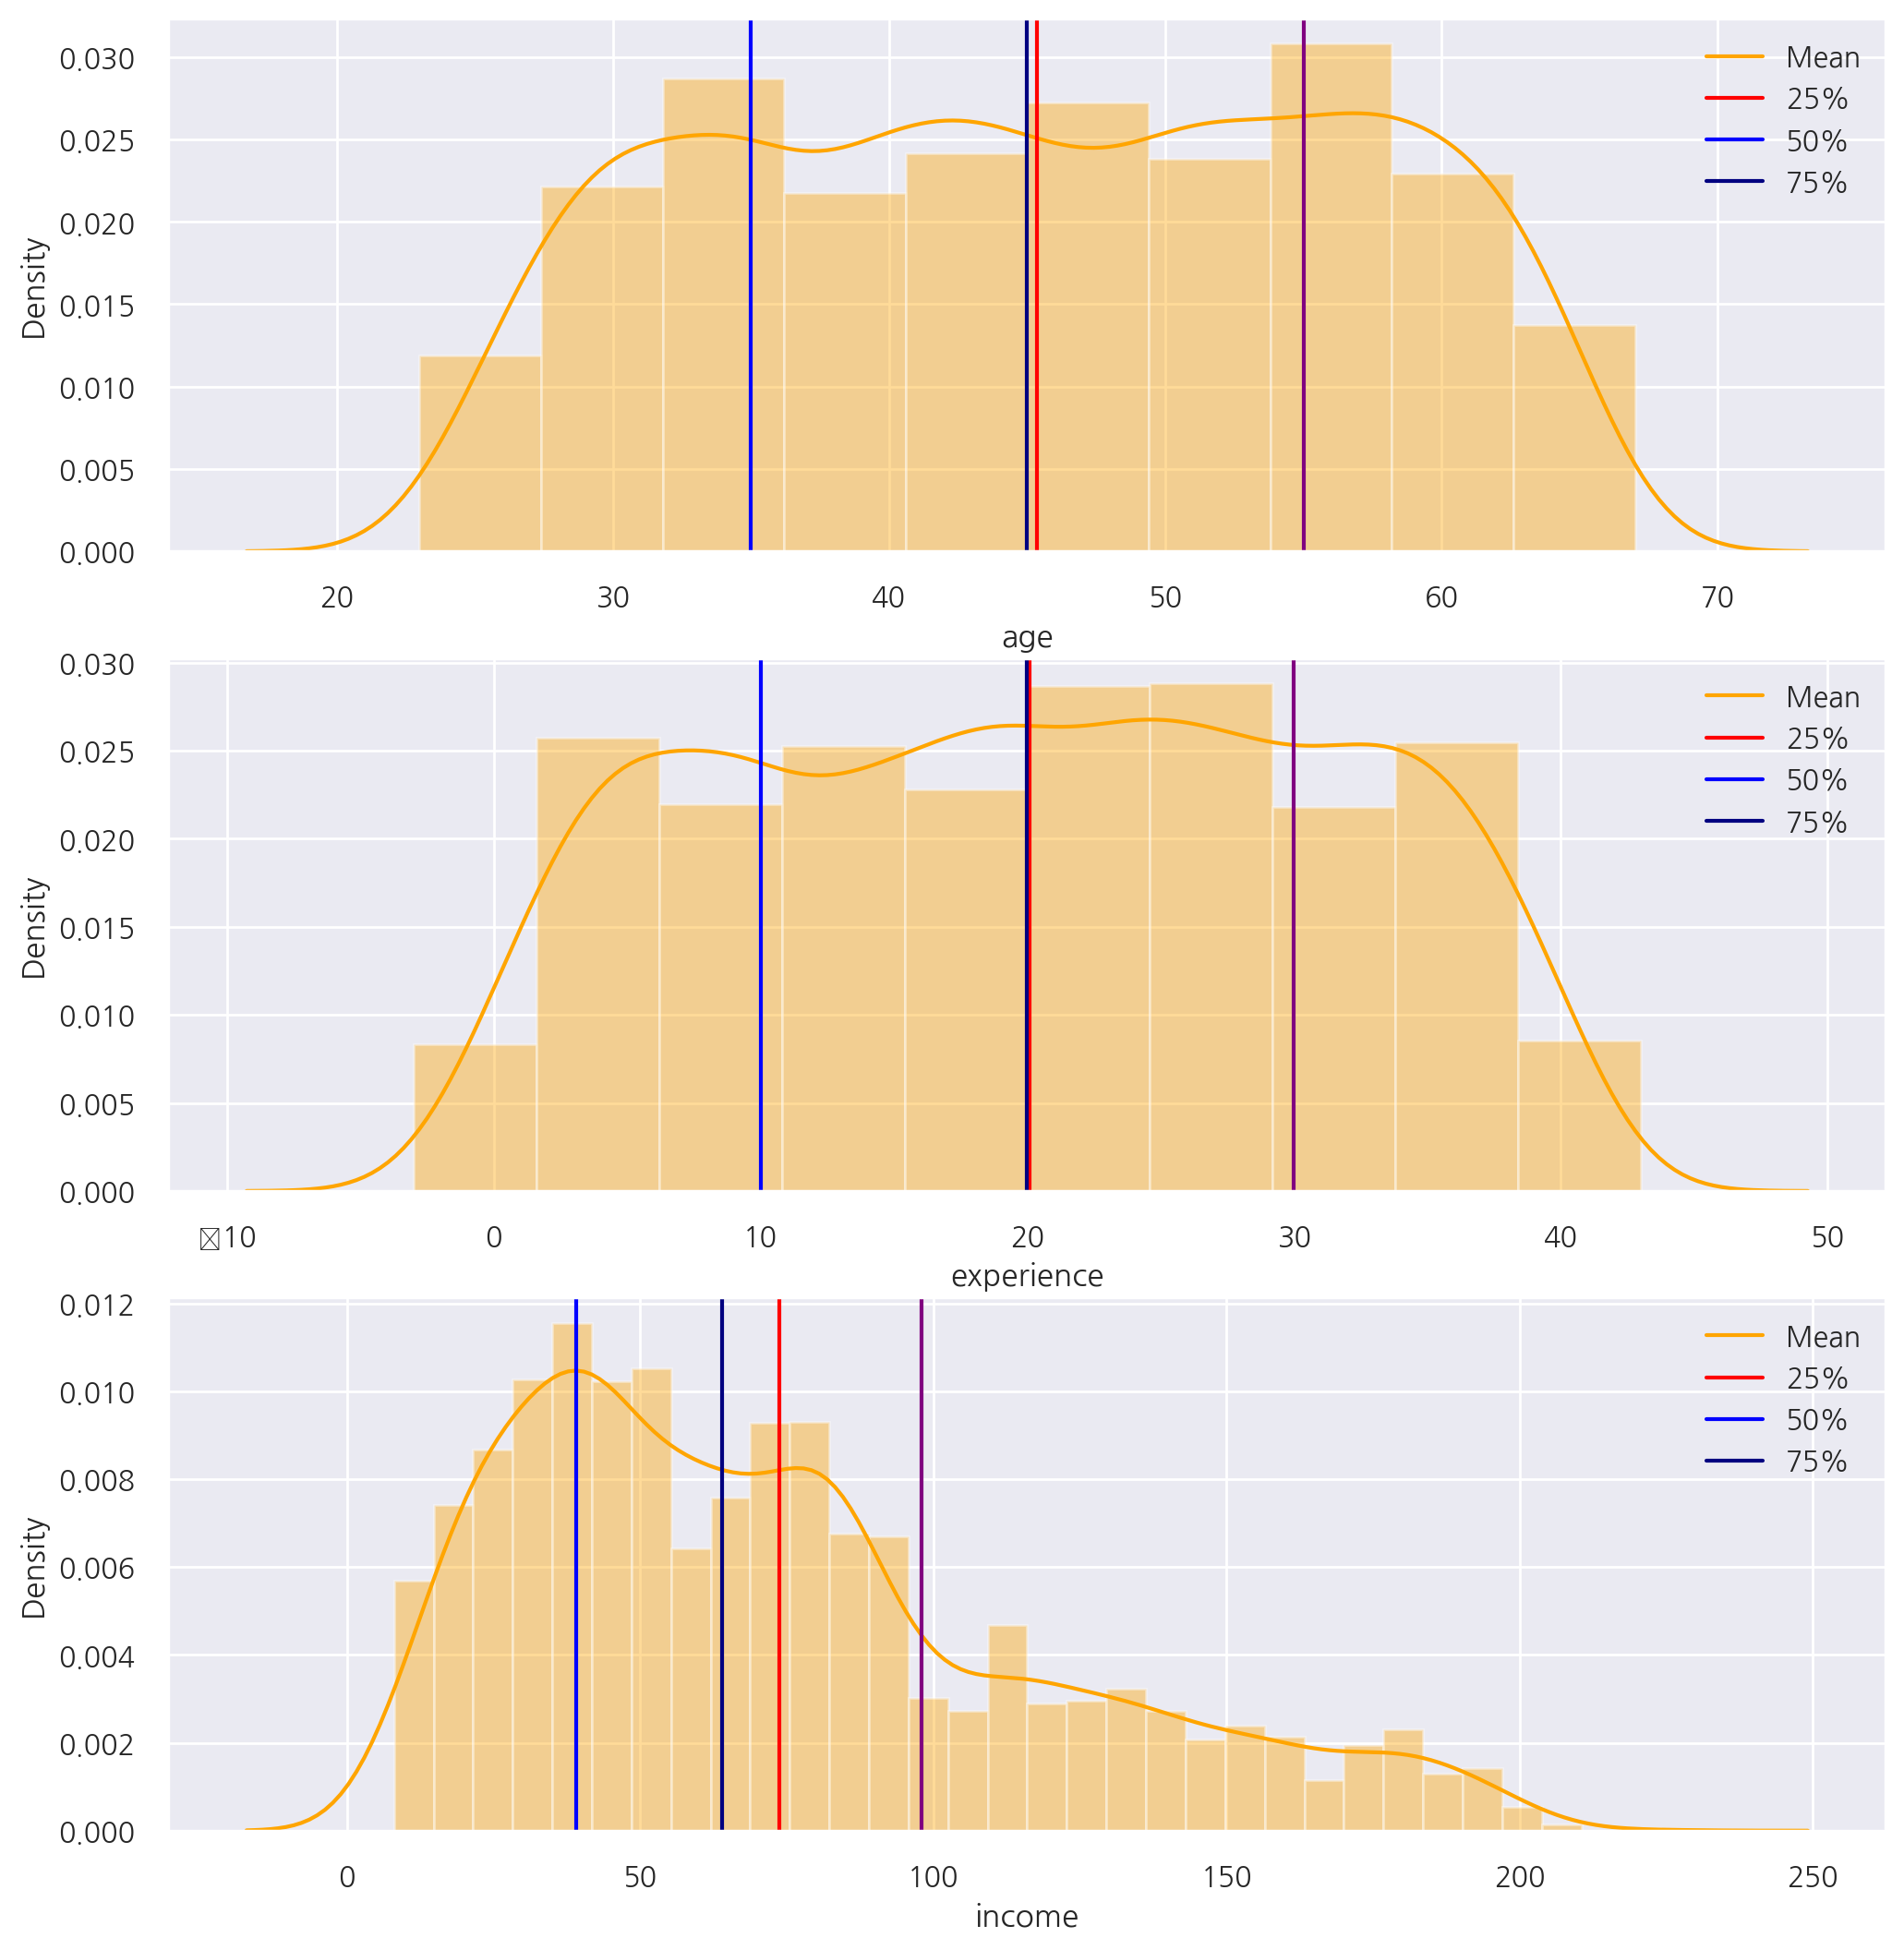

In [64]:
#Age, exp, income에 대해 좀 더 그래프를 자세히 그려보자
#세로선으로 평균값, 25, 50, 75% 선을 그어주자
def drawline(plt, col):
    mean = bk1.describe().loc['mean', col]
    m25 = bk1.describe().loc['25%', col]
    m50 = bk1.describe().loc['50%', col]
    m75 = bk1.describe().loc['75%', col]
    plt.axvline(mean, color = 'red')
    plt.axvline(m25, color = 'blue')
    plt.axvline(m50, color = 'navy')
    plt.axvline(m75, color = 'purple')
    plt.legend({'Mean': mean, '25%' : m25, '50%' : m50, '75%' : m75})

f, ax = plt.subplots(3, 1, figsize=(12, 13), dpi=200)

pp = sns.distplot(bk1['age'], ax = ax[0], bins=10, color = 'orange')
drawline(pp, 'age')
pp = sns.distplot(bk1['experience'], ax = ax[1], bins=10, color = 'orange')
drawline(pp, 'experience')
pp = sns.distplot(bk1['income'], ax = ax[2], color = 'orange') # displot > distplot (오타 수정)
drawline(pp, 'income')

income에서 주의 깊게 봐야하는 부분은 전체 중에서 75%도 $100,000 (1억원) 이하임을 알 수 있다. 

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


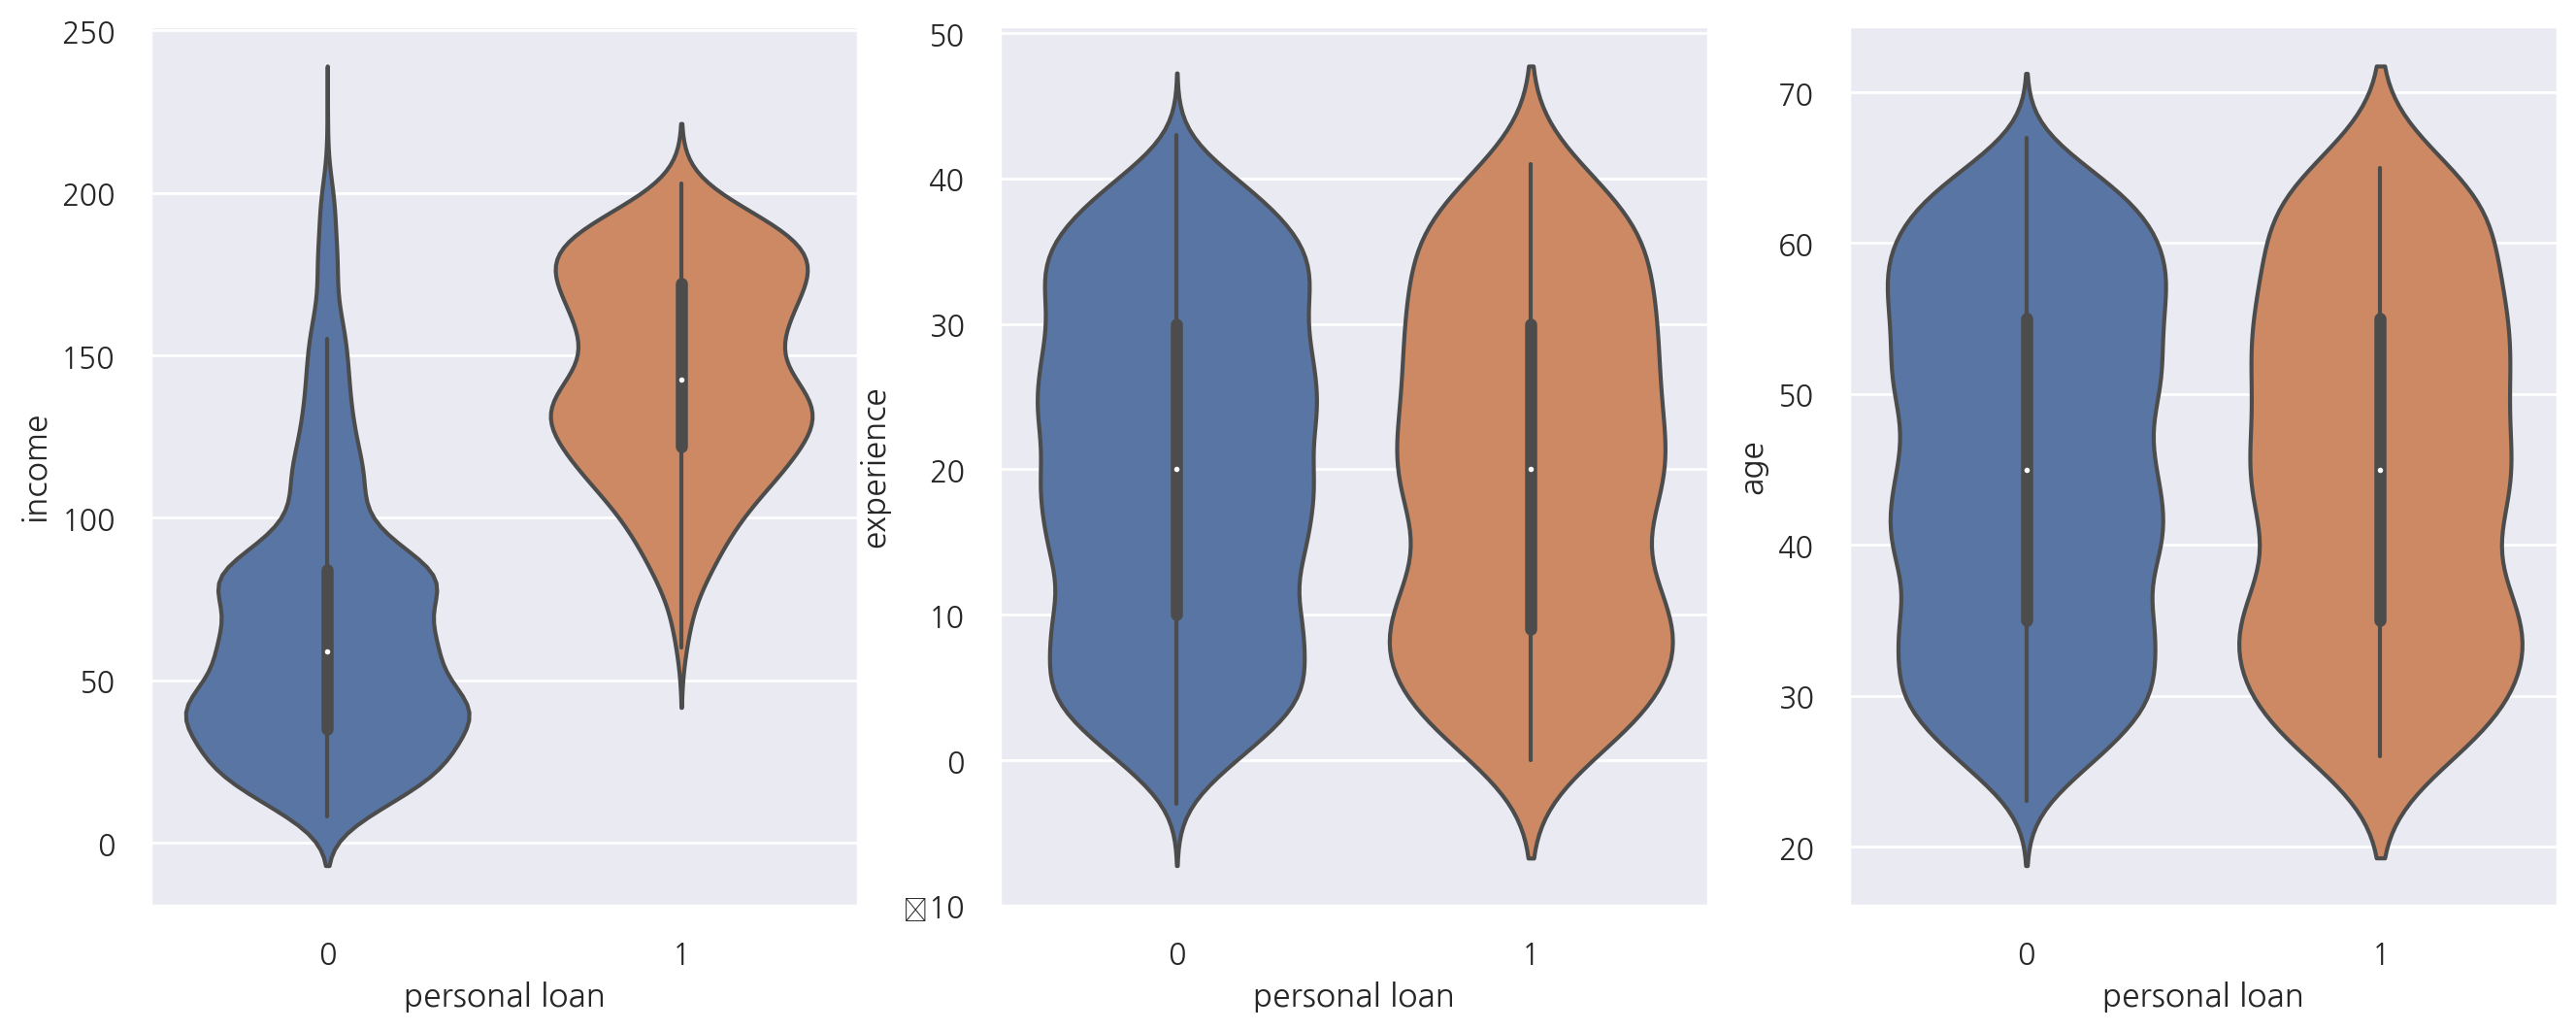

In [66]:
#violin plot으로 범주형 변수 확인하기
f, ax = plt.subplots(1, 3, figsize=(16, 6), dpi=200)

sns.violinplot(bk1['personal loan'],bk1['income'],ax=ax[0]);
sns.violinplot(bk1['personal loan'],bk1['experience'],ax=ax[1]);
sns.violinplot(bk1['personal loan'],bk1['age'],ax=ax[2]);

plt.show()
#수입이 높을 때 personal loan을 받을 확률이 높다!

* income : 수입이 높을수록 대출을 많은 받은 경향을 보인다.
* experience : 대출 유무에 의미 없다.
* age : 대출 유무에 의미 없다.

###4-3. 변수 간 상관관계 파악하기

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]), <a list of 12 Text major ticklabel objects>)

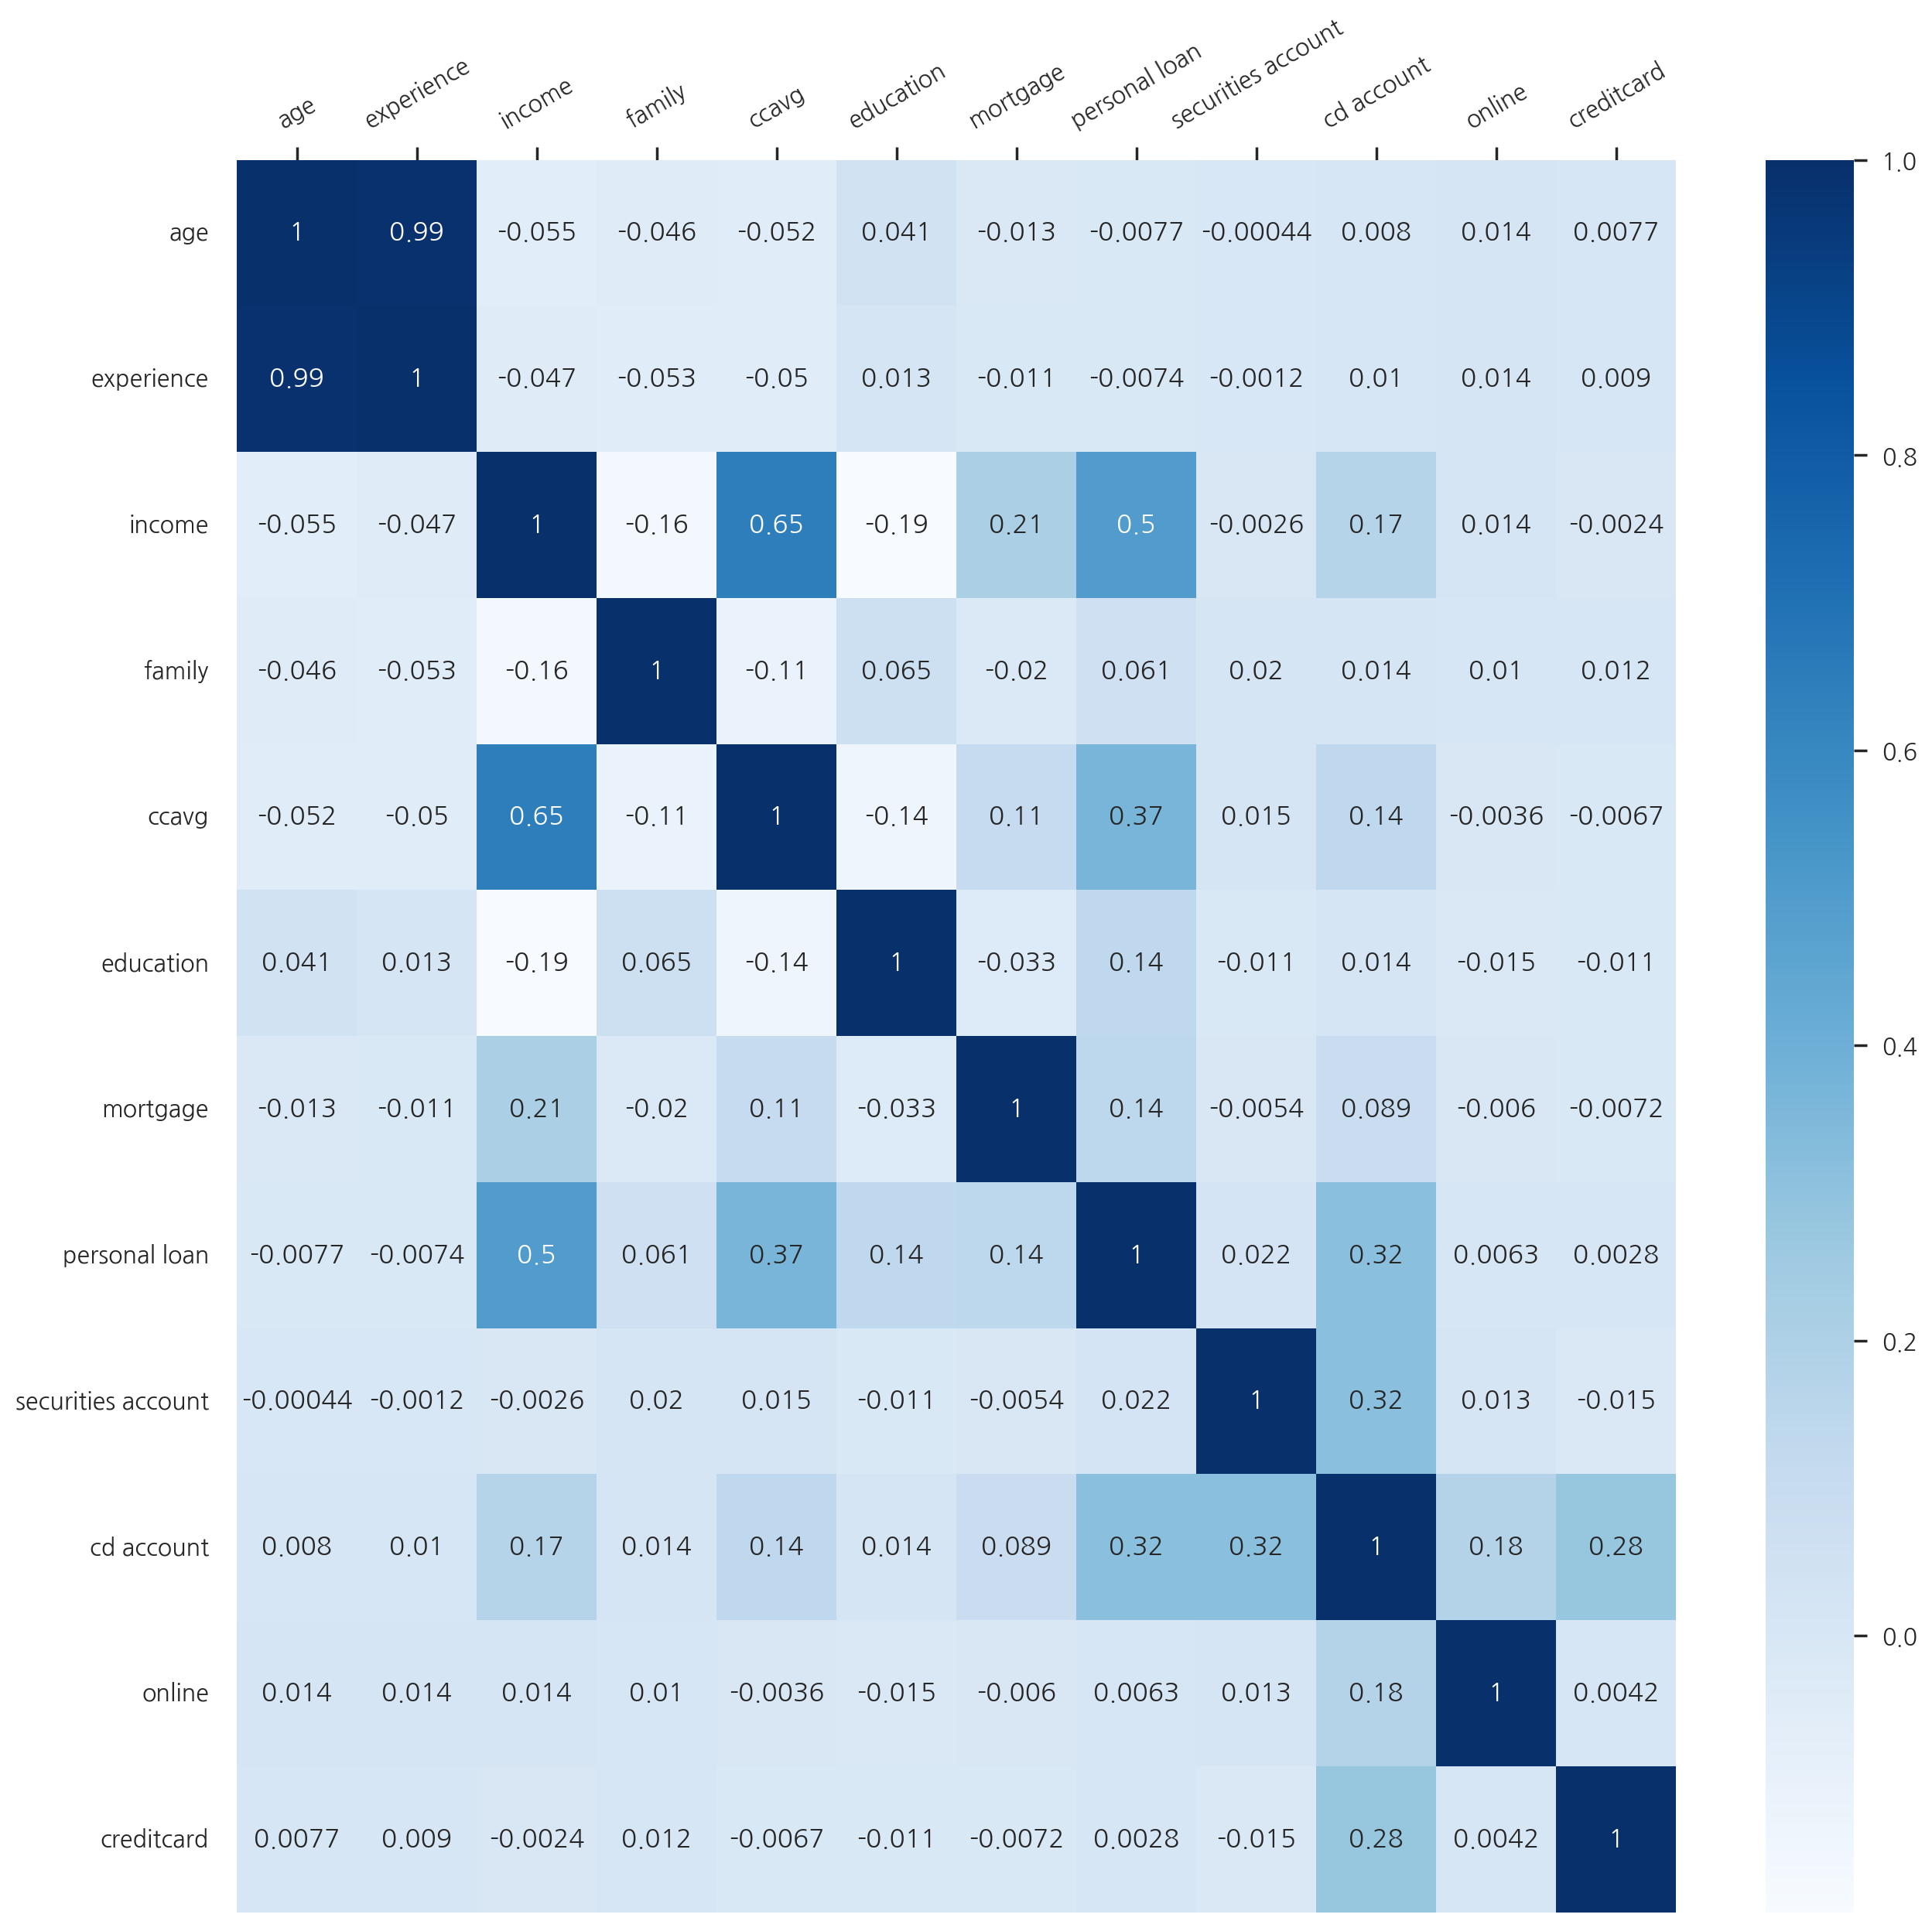

In [67]:
#Heat map을 그려서 변수 간 상관관계를 파악하자
f, ax = plt.subplots(1, 1, figsize=(15, 15), dpi=200)
sns.heatmap(bk1.corr(), ax=ax, annot=True, fmt='.2g', cmap="Blues")
ax.xaxis.tick_top()
plt.xticks(rotation=30)

#가장 상관관계가 높은 것은 나이와 경험(0.99).
#CCAvg와 수입은 중간 정도의 상관관계(0.65)를 가진다.
#수입은 CCAvg, Mortgage, CD Account, Personal Loan에 영향을 미친다

* age, experience는 연관성이 매우 높기 때문에 서로 대체하여 사용할 수 있는 변수이다.
* personal loan ~ income : 0.5
* income ~ ccavg : 0.65
* 음의 상관 관계를 가지는 것도 보인다. 
* 상관 관계 분석을 통하여 로지스틱 회귀 분석을 할 때에 어떤 칼럼을 이용할 것인지 알 수 있다.

###4-4. 구간화 해서 그래프 그리기 (유용한 방법)

In [32]:
#신용카드 월평균 이용금액을 구간화 하자
df4 = bk1[['ccavg', 'creditcard', 'personal loan']]
df4['ccavg_bin'] = pd.cut(df4['ccavg'], bins = [0, 2, 4, 6, 100], labels = ['1-2', '3-4', '5-6', '7+'])
df4

<ipython-input-32-38195abe6111>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['ccavg_bin'] = pd.cut(df4['ccavg'], bins = [0, 2, 4, 6, 100], labels = ['1-2', '3-4', '5-6', '7+'])


,ccavg,creditcard,personal loan,ccavg_bin
0,1.6,0,0,1-2
1,1.5,0,0,1-2
2,1.0,0,0,1-2
3,2.7,0,0,3-4
4,1.0,1,0,1-2
...,...,...,...,...
4995,1.9,0,0,1-2
4996,0.4,0,0,1-2
4997,0.3,0,0,1-2
4998,0.5,0,0,1-2


* ```pd.cut(bins=(미포함, 포함])```
* ccavg가 0인 경우는 ccavg_bin이 NaN이 될 것이다.
* ccavg가 7부터 ~ 100 미만까지는 ccavg_bin이 7+가 될 것이다.

In [33]:
df4[bk1["ccavg"]==0]

,ccavg,creditcard,personal loan,ccavg_bin
63,0.0,0,0,NaN
128,0.0,0,0,NaN
198,0.0,0,0,NaN
210,0.0,0,0,NaN
215,0.0,1,0,NaN
...,...,...,...,...
4801,0.0,0,0,NaN
4826,0.0,0,0,NaN
4837,0.0,0,0,NaN
4910,0.0,0,0,NaN


In [69]:
#구간별로 신용카드 유무와 신용카드 월평균 사용액 집계
df5 = df4.groupby(['ccavg_bin', 'creditcard'])['ccavg'].sum().reset_index()
df5

,ccavg_bin,creditcard,ccavg
0,1-2,0,2172.366667
1,1-2,1,930.333333
2,3-4,0,2361.250000
3,3-4,1,970.250000
4,5-6,0,1097.300000
5,5-6,1,413.533333
6,7+,0,1236.533333
7,7+,1,508.000000


In [35]:
df4["ccavg"].describe()

count    5000.000000
mean        1.937913
std         1.747666
min         0.000000
25%         0.700000
50%         1.500000
75%         2.500000
max        10.000000
Name: ccavg, dtype: float64

해당 은행의 신용카드를 가지고 있지 않은 사람이 신용카드 월 평균 이용 금액이 더 높다. (어떻게든 그 고객들은 해당 은행에서 신용카드를 만들도록 유도해야 한다.)

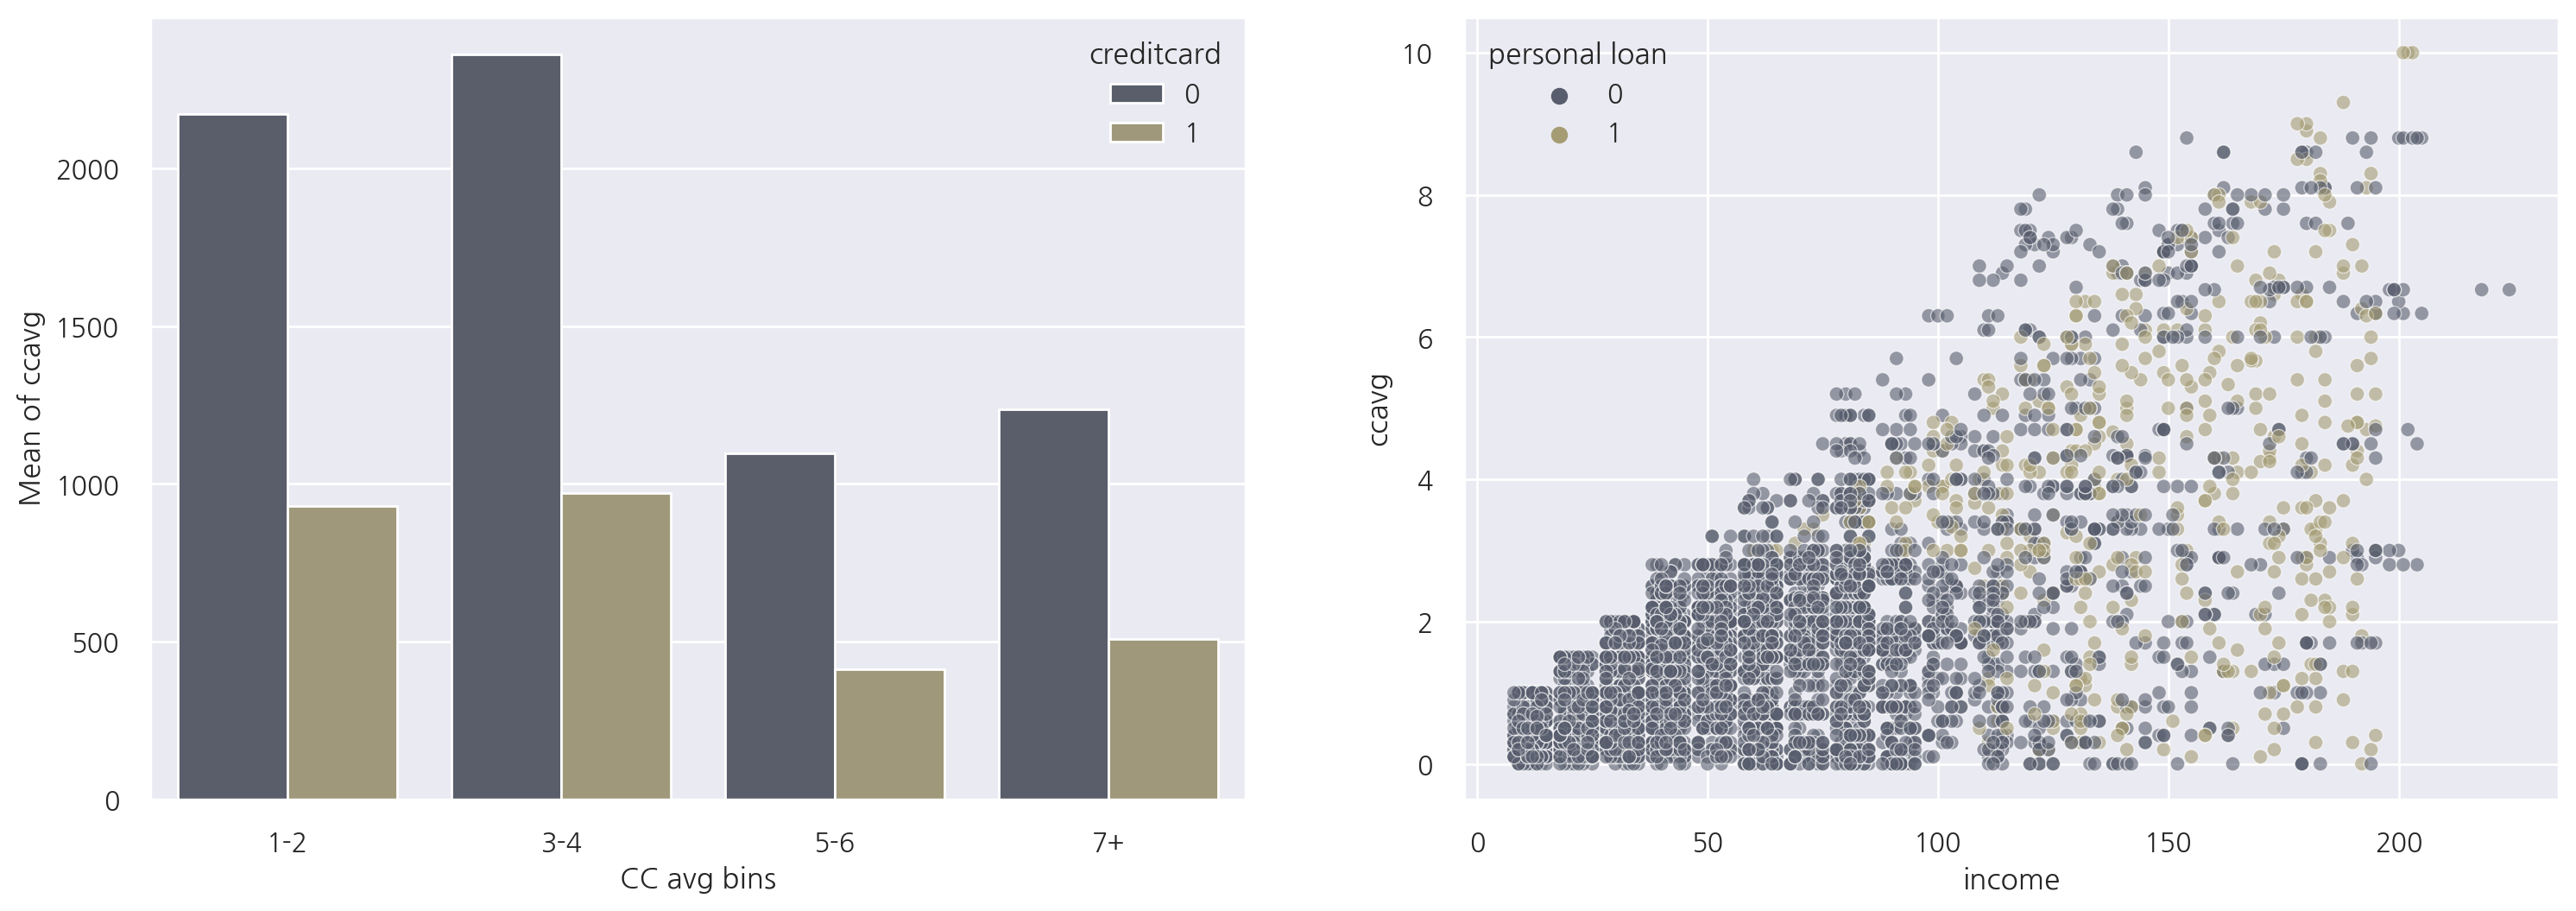

In [70]:
#구간화 결과를 그래프로 나타내자(bar plot)
f, ax= plt.subplots(1, 2, figsize = (18, 6), dpi=200)

sns.barplot(df5['ccavg_bin'], df5['ccavg'], hue = df5['creditcard'], palette= "cividis", ax=ax[0]);
ax[0].set(xlabel = 'CC avg bins', ylabel = 'Mean of ccavg');

#참조할 수 있도록 수입과 신용카드 월평균 사용액을 함께 나타내자
sns.scatterplot(x='income', y='ccavg', data=bk1, ax=ax[1], hue = 'personal loan', palette= "cividis", alpha=0.6)

* 신용카드를 다른 은행에서 많이 사용하고 있다. 
* 수입이 높을수록 월 별 신용카드 평균 이용 금액이 크고, 대출을 많이 받는다.

따라서 수입이 높은 고객들을 신용카드를 만들도록 유도하는 것이 중요하다.

##5.로지스틱 회귀분석  
로지스틱 회귀분석(Logistic regression):  
종속변수와 독립변수 사이의 관계를 함수로 나타내어, 이 다음을 예측하는 방식.  
독립변수 사이의 선형 결합으로 종속변수를 설명하는 것은 선형 회귀와 동일하지만, 종속변수가 범주형 데이터를 대상으로 한다는 점이 다르다.

In [37]:
#로지스틱 회귀분석에 필요한 sklearn 패키지 등등 불러오기
import os

from sklearn.linear_model import LogisticRegression # 로지스틱 회귀모형 불러오기.
from sklearn.model_selection import train_test_split # 데이터 나눌 때 이용하는 모듈 불러오기.
from sklearn import metrics # 예측의 품질을 "수량화"시키는 모듈 불러오기.
import sklearn.preprocessing as preprocessing # 전처리 하는 모듈 불러오기.
from sklearn.preprocessing import StandardScaler, LabelEncoder # 전처리 모듈 안에 표준화, 라벨 인코더 (카테고리 데이터 > 수치형으로 변환)
from sklearn.metrics import confusion_matrix # 분류를 잘했는지 확인시켜주는 "혼동 행렬"
from sklearn.metrics import accuracy_score # 정확도를 나타내는 모듈 불러오기.

import statsmodels.api as sm # statsmodels : 많은 다양한 통계적 모델의 추정을 위한 클래스와 함수를 담고 있는 모듈이다.
import itertools # itertools : 편리하게 반복자를 만드는 모듈이다.
import time # time : 시간 내장 모듈이다.

###5-1. 데이터 나누기
설명변수(X), 타겟변수(Y) 분리 및 학습데이터와 평가데이터 

* 회귀분석의 목표:  
어떤 특징을 가진 고객이 개인대출을 받을 것인가?

In [38]:
bk1.head()

,age,experience,income,family,ccavg,education,mortgage,personal loan,securities account,cd account,online,creditcard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [39]:
#loan이 타겟변수, 나머지 컬럼이 설명변수가 된다
feature_columns = list(bk1.columns.difference(['personal loan'])) # A.difference([B]) : A에 B 제외한 나머지가 모두 출력된다.
feature_columns

['age',
 'ccavg',
 'cd account',
 'creditcard',
 'education',
 'experience',
 'family',
 'income',
 'mortgage',
 'online',
 'securities account']

In [40]:
#설명변수
X = bk1[feature_columns] # 설명 변수는 대문자 X로 표기한다.
#타겟변수
y = bk1['personal loan'] # 대출여부: 1 or 0

In [41]:
#학습 데이터와 평가 데이터 나누기(7:3으로 나누자!)
#train: 학습 데이터, test: 평가 데이터
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(3500, 11) (1500, 11) (3500,) (1500,)


In [42]:
print('label count of y: ', np.bincount(y))
print('label count of train_y: ', np.bincount(train_y))
print('label count of test_y: ', np.bincount(test_y))

label count of y:  [4520  480]
label count of train_y:  [3177  323]
label count of test_y:  [1343  157]


In [43]:
train_x

,age,ccavg,cd account,creditcard,education,experience,family,income,mortgage,online,securities account
1840,55,0.4,0,0,3,25,4,23,88,0,0
2115,57,1.4,0,0,1,31,3,30,0,0,0
4437,63,1.5,0,0,1,38,2,63,0,1,0
1146,31,0.1,0,0,1,7,1,71,78,0,1
2486,61,1.3,0,0,1,36,1,130,257,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4426,33,4.6,0,0,1,8,1,140,0,1,0
466,25,0.9,0,0,3,0,2,13,0,1,0
3092,43,0.4,0,0,1,18,2,113,325,0,1
3772,35,3.0,0,0,1,10,2,152,0,1,0


In [44]:
#학습 데이터와 평가 데이터 나누기(7:3으로 나누자!)
#train: 학습 데이터, test: 평가 데이터
train_x, test_x, train_y, test_y = train_test_split(X, y, stratify=y, train_size=0.7, test_size=0.3, random_state=42)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(3500, 11) (1500, 11) (3500,) (1500,)


In [45]:
print('label count of y: ', np.bincount(y))
print('label count of train_y: ', np.bincount(train_y))
print('label count of test_y: ', np.bincount(test_y))

label count of y:  [4520  480]
label count of train_y:  [3164  336]
label count of test_y:  [1356  144]


In [46]:
print(3164/4520*100)
print(1356/4520*100)

70.0
30.0


stratify = y는 계층화를 의미한다. 계층화는 ```train_test_split 함수가 나눠놓은 클래스 레이블 비율을 입력 데이터 셋과 동일하게 맞추는 과정이다.``` numpy에 있는 bincount함수를 이용하면 (빈도수를 구해주는 함수이다.) 배열에 있는 값의 등장 횟수를 확인할 수 있다.

```데이터 분포에 맞게 데이터를 쪼개는데에 계층화가 이용된다. (y가 정답 또는 예측하고자 하는 값이기 때문에 y의 분포 기준으로 분할하기.)```


* [train_test_split 사용 시 유의할 점 참고 블로그 링크](https://cleancode-ws.tistory.com/134)



In [47]:
train_x

,age,ccavg,cd account,creditcard,education,experience,family,income,mortgage,online,securities account
1250,47,2.666667,0,0,2,20,1,81,0,1,0
206,49,1.000000,0,0,1,25,1,31,0,1,1
2762,56,3.700000,0,0,1,31,2,65,0,1,0
4276,50,7.300000,0,1,1,24,1,155,0,1,0
4802,35,2.800000,0,0,1,11,3,58,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2805,37,5.800000,0,0,3,12,3,182,0,1,0
2341,36,1.500000,0,0,3,10,1,91,289,1,0
1585,57,2.700000,0,0,1,31,2,131,0,0,0
3152,40,1.000000,0,0,3,15,1,83,0,0,0


계층화를 이용한 경우와 계층화를 이용하지 않은 경우를 비교하면 ```데이터가 다르게 추출되었음을 알 수 있다. (계층화를 하는 경우에는 데이터의 분포를 고려한다.)```

In [48]:
#각 컬럼의 값들이 정규분포를 가지도록 scaling 해 주는 과정
scaler = StandardScaler() # 객체를 생성한다. StandardScaler : 표준화 의미한다.
train_x = scaler.fit_transform(train_x) # 데이터 전처리에 사용되는 함수 fit_transform()이다.
test_x = scaler.fit_transform(test_x)

In [49]:
train_x # 값들이 변환되어 나온다.

array([[ 0.1419242 ,  0.42481017, -0.25583004, ..., -0.55371236,
         0.8242952 , -0.33964703],
       [ 0.31548629, -0.53177867, -0.25583004, ..., -0.55371236,
         0.8242952 ,  2.94423306],
       [ 0.92295362,  1.01789525, -0.25583004, ..., -0.55371236,
         0.8242952 , -0.33964703],
       ...,
       [ 1.00973466,  0.44394195, -0.25583004, ..., -0.55371236,
        -1.21315762, -0.33964703],
       [-0.46554312, -0.53177867, -0.25583004, ..., -0.55371236,
        -1.21315762, -0.33964703],
       [-1.33335358, -0.589174  , -0.25583004, ..., -0.55371236,
         0.8242952 ,  2.94423306]])

###5-2. 모델 만들기 

model 만들고, fit 이용하여 학습시키기.

In [50]:
#모델 만들기: 알고리즘 방식 = liblinear, iteration 최대 횟수 = 2000
lrm = LogisticRegression(solver='liblinear', max_iter=2000) # solver : 문제 최적화 시 사용되는 알고리즘, max_iter : 최대 반복 횟수

In [51]:
#학습 데이터 집어넣기
lrm.fit(train_x, train_y)

LogisticRegression(max_iter=2000, solver='liblinear')

In [52]:
#모델에서 산출된 계수 확인하기
coeff_df = pd.DataFrame(lrm.coef_) # 함수의 각 계수들
coeff_df['Intercept'] = lrm.intercept_ # 절편
coeff_df # 산출된 계수로 그래프를 그릴 수 있다.

,0,1,2,3,4,5,6,7,8,9,10,Intercept
0,-0.250034,0.228485,0.90614,-0.481869,1.319806,0.271172,0.755312,2.291312,0.068812,-0.312519,-0.313708,-4.414426


In [53]:
for sol in ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']:
    lrm=LogisticRegression(solver=sol, max_iter=20000) # ConvergenceWarning : max_iter 늘려주면 된다.
    # print(lrm)
    lrm.fit(train_x, train_y)
    coeff_df=pd.DataFrame(lrm.coef_)
    coeff_df["intercept"]=lrm.intercept_
    print("---- 구분선 ----")
    print(coeff_df)

---- 구분선 ----
          0         1         2         3         4         5         6  \
0 -0.241794  0.235528  0.932952 -0.500747  1.368318  0.265716  0.782527   

          7         8         9        10  intercept  
0  2.370116  0.070596 -0.327847 -0.324254  -4.555313  
---- 구분선 ----
          0         1        2         3         4         5         6  \
0 -0.250034  0.228485  0.90614 -0.481869  1.319806  0.271172  0.755312   

          7         8         9        10  intercept  
0  2.291312  0.068812 -0.312519 -0.313708  -4.414426  
---- 구분선 ----
          0         1         2         3         4         5         6  \
0 -0.241776  0.235525  0.932948 -0.500748  1.368309  0.265713  0.782535   

          7         8        9        10  intercept  
0  2.370124  0.070583 -0.32785 -0.324255  -4.555308  
---- 구분선 ----
          0         1         2         3         4         5         6  \
0 -0.239719  0.235524  0.932945 -0.500738  1.368258  0.263666  0.782529   

          7   

solver를 변경하면서 반복문을 돌려 보니, 모든 solver에 대한 계수와 y절편을 구할 수 있다.

###5-3. 모델링 결과 확인하기

predict를 이용하여 예측시켜보기. 그런 다음에 정확도를 측정해보기.

In [54]:
lrm = LogisticRegression(solver='liblinear', max_iter=2000) # solver : 문제 최적화 시 사용되는 알고리즘, max_iter : 최대 반복 횟수
lrm.fit(train_x, train_y)

LogisticRegression(max_iter=2000, solver='liblinear')

In [55]:
#모델에 학습 데이터를 넣어 정확도(accuracy) 확인하자
training_predict = lrm.predict(train_x)
print('학습 데이터를 넣었을 때 모델의 정확도: {:.4f}'.format(metrics.accuracy_score(train_y, training_predict))) # true_y, predict_y

학습 데이터를 넣었을 때 모델의 정확도: 0.9517


In [56]:
#학습 데이터로 만든 모델에 테스트 데이터를 넣어 어떤 분류가 되었는지 확인하자
test_predict = lrm.predict(test_x)
print('테스트 데이터를 넣었을 때 모델의 정확도: {:.4f}'.format(metrics.accuracy_score(test_y, test_predict))) # true_y, predict_y

테스트 데이터를 넣었을 때 모델의 정확도: 0.9527


In [57]:
for sol in ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']:
    lrm=LogisticRegression(solver=sol, max_iter=20000) # ConvergenceWarning : max_iter 늘려주면 된다.
    lrm.fit(train_x, train_y)
    print("------- 구분선 -------")
    print("---- 학습 데이터 ----")
    training_predict = lrm.predict(train_x)
    print('학습 데이터를 넣었을 때 모델의 정확도: {:.4f}'.format(metrics.accuracy_score(train_y, training_predict))) # true_y, predict_y
    print("---- 테스트 데이터 ----")
    test_predict = lrm.predict(test_x)
    print('테스트 데이터를 넣었을 때 모델의 정확도: {:.4f}'.format(metrics.accuracy_score(test_y, test_predict))) # true_y, predict_y

------- 구분선 -------
---- 학습 데이터 ----
학습 데이터를 넣었을 때 모델의 정확도: 0.9517
---- 테스트 데이터 ----
테스트 데이터를 넣었을 때 모델의 정확도: 0.9520
------- 구분선 -------
---- 학습 데이터 ----
학습 데이터를 넣었을 때 모델의 정확도: 0.9517
---- 테스트 데이터 ----
테스트 데이터를 넣었을 때 모델의 정확도: 0.9527
------- 구분선 -------
---- 학습 데이터 ----
학습 데이터를 넣었을 때 모델의 정확도: 0.9517
---- 테스트 데이터 ----
테스트 데이터를 넣었을 때 모델의 정확도: 0.9520
------- 구분선 -------
---- 학습 데이터 ----
학습 데이터를 넣었을 때 모델의 정확도: 0.9517
---- 테스트 데이터 ----
테스트 데이터를 넣었을 때 모델의 정확도: 0.9520
------- 구분선 -------
---- 학습 데이터 ----
학습 데이터를 넣었을 때 모델의 정확도: 0.9517
---- 테스트 데이터 ----
테스트 데이터를 넣었을 때 모델의 정확도: 0.9520


solver가 liblinear인 경우 가장 테스트 데이터 정확도가 높았다.

###5-4. Confusion matrix & Report

In [58]:
#confusion matrix 구하기
logistic_cm = metrics.confusion_matrix(test_y, test_predict, labels=[1,0]) # true_y, predict_y
print(logistic_cm)

[[  95   49]
 [  23 1333]]


test data는 분류 잘 되어있다.

In [59]:
#confusion matrix 구하기
metrics.confusion_matrix(train_y, training_predict, labels=[1,0]) # true_y, predict_y

array([[ 209,  127],
       [  42, 3122]])

In [60]:
logistic_cm_df = pd.DataFrame(logistic_cm, index = [i for i in ['1','0']], columns = [i for i in ['predict 1', 'predict 0']])
logistic_cm_df

,predict 1,predict 0
1,95,49
0,23,1333


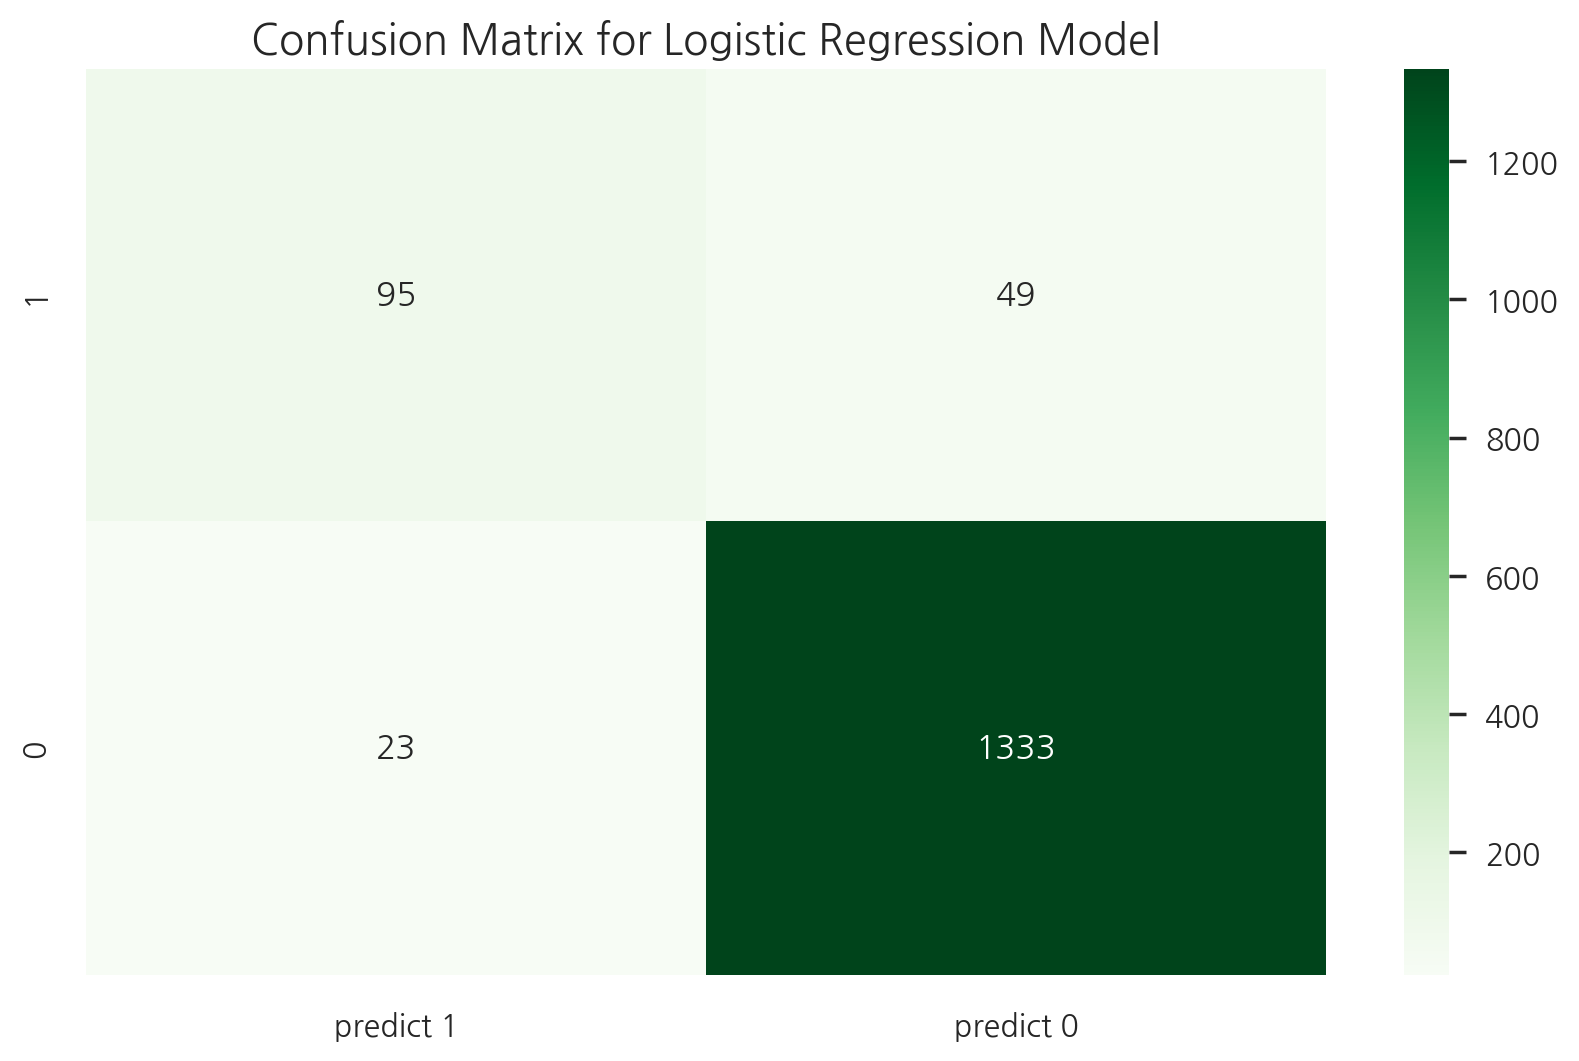

In [71]:
f, ax= plt.subplots(1, 1, figsize = (10, 6), dpi=200)
plt.title('Confusion Matrix for Logistic Regression Model', size=15)
sns.heatmap(logistic_cm_df, annot=True, fmt='g',ax=ax, cmap="Greens")

#True Positives: 대출 제안을 받을 사람을 정확하게 예측  =  95
#True Negatives (TN): 대출 제안을 거절할 사람을 정확하게 예측  =  1334
#False Positives (FP): 대출 제안을 받을 것으로 잘못 판단(Type I error)  =  22
#False Negatives (FN): 대출 제안을 받지 않을 것으로 잘못 판단(Type II error)  =  49

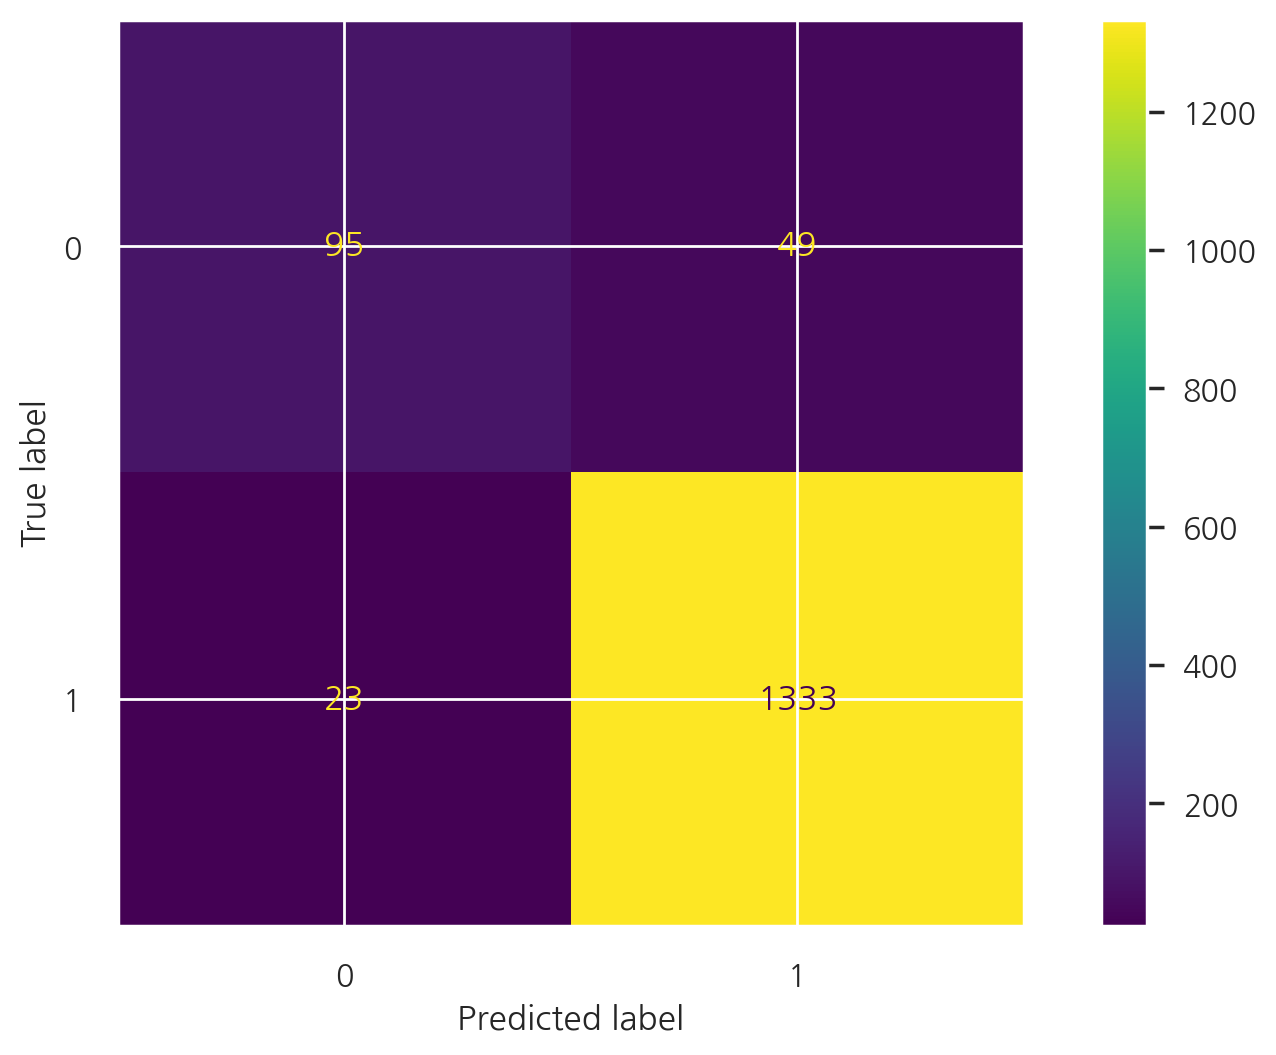

In [76]:
from sklearn.metrics import ConfusionMatrixDisplay
# heatmap 대신에 ConfusionMatrixDisplay를 이용하여 혼동 행렬을 그릴 수 있다.

logistic_cm = confusion_matrix(test_y, test_predict, labels=[1, 0]) # true_y, predict_y, labels로 원하는 라벨 순서 정해주기.
disp=ConfusionMatrixDisplay(logistic_cm)
fig, ax = plt.subplots(figsize=(10,6), dpi=200)

disp.plot(ax=ax)
plt.show()

In [63]:
# classification_report : 주요 분류 측정에 대하여 레포트를 작성해준다.
print('Logistic Regression Model - Classification Report')
print('')
print(metrics.classification_report(test_y, test_predict, labels=[1,0])) # y_true, y_predict

Logistic Regression Model - Classification Report

              precision    recall  f1-score   support

           1       0.81      0.66      0.73       144
           0       0.96      0.98      0.97      1356

    accuracy                           0.95      1500
   macro avg       0.88      0.82      0.85      1500
weighted avg       0.95      0.95      0.95      1500



##6.Review

* Thera bank 데이터는:  
총 데이터 수:  70000  
총 결측치 수: 0 = 전체 데이터의 0.00%   
Thera bank 고객의 나이는 23세부터 67세까지 있으며 평균 나이는 45.3세이다.  
Thera bank 고객의 평균 수입은 73774.2 $이며, 최고수입은 224000 $로 평균의 3.0배이다.

* 수입/월평균신용카드사용량/가족인원수와 대출 사이의 관계는?  
   : 대출 받은 사람의 수입이 대출 받지 않은 사람보다 3배 정도 높다  
   : 대출받은 사람이 받지 않은 사람보다 월평균 신용카드 사용액이 2배 가량 높다  
   : 가족 인원수가 많을 수록 대출 금액이 올라가나 정비례 하지는 않는다  
* 월 평균 사용 금액을 구간화 해서 특징을 볼 수 있을까?
* 로지스틱 회귀 분석을 사용해서 신규 고객의 대출여부를 예측하는 모델 만들기
